In [1]:
# Impor semua library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Membaca dan Menampilkan Data

In [2]:
# Membaca data menggunakan pandas
url = 'https://raw.githubusercontent.com/Adhonevriza/best-salary-prediction-model/refs/heads/main/salary_data.csv'
data = pd.read_csv(url, encoding = 'unicode_escape')

In [3]:
# Menampilkan 5 baris teratas dari data
# Bertujuan untuk mengecek struktur data, apakah data berhasil dibaca dengan benar
data.head()

,employee_id,experience_years,salary
0,EM_101,16.8,3166.9
1,EM_102,10.7,3126.9
2,EM_103,14.1,3278.8
3,EM_104,9.1,2828.8
4,EM_105,8.9,2728.7


## Exploratory Data Analysis

In [4]:
# Informasi mengenai kolom-kolom pada data
# Apakah ada missing value atau tidak
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   employee_id       100 non-null    object 
 1   experience_years  100 non-null    float64
 2   salary            100 non-null    float64
dtypes: float64(2), object(1)
memory usage: 2.5+ KB


In [5]:
# Tampilkan deskripsi statistik data
# Ukuran 25%, 50%, dan 75% di sini berarti Q1, Q2 (median), dan Q3 dari data
data.describe()

,experience_years,salary
count,100.000000,100.000000
mean,10.032000,2663.418000
std,5.804733,664.867378
min,0.000000,1046.400000
25%,5.025000,2192.750000
50%,10.000000,2984.150000
75%,14.975000,3174.500000
max,20.000000,3405.800000


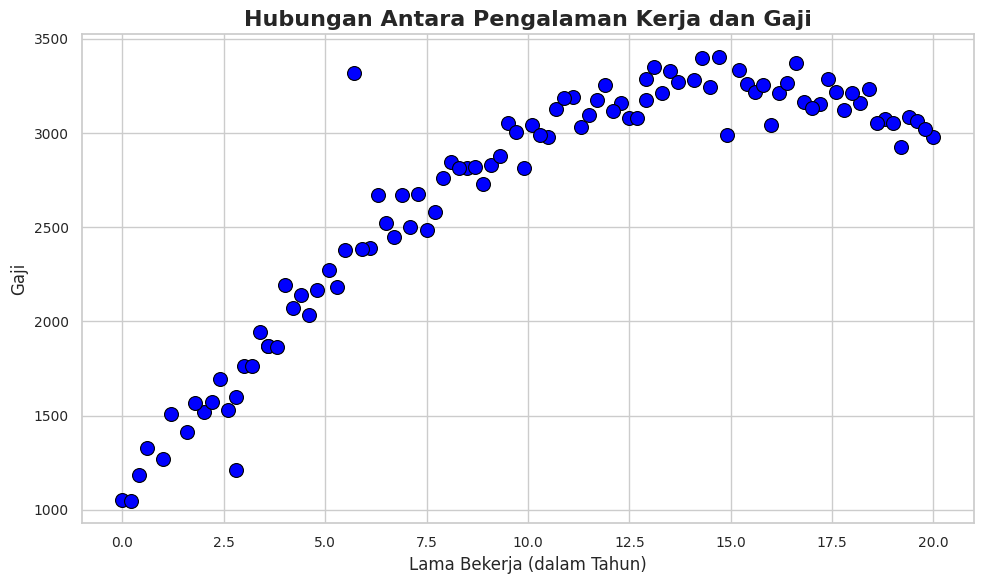

In [43]:
# Tetapkan tema seaborn
sns.set_theme(style = "whitegrid")

# Membuat diagram pencar (scatter plot)
plt.figure(figsize = (10, 6))
sns.scatterplot(x = data['experience_years'], y = data['salary'],
                color = "blue", s = 100, edgecolor = "black")

# Menambahkan judul dan label pada diagram
plt.title('Hubungan Antara Pengalaman Kerja dan Gaji', fontsize = 16, fontweight = 'bold')
plt.xlabel('Lama Bekerja (dalam Tahun)', fontsize = 12)
plt.ylabel('Gaji', fontsize = 12)

# Tingkatkan ke-estetikan diagram
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.tight_layout()

# Mendisplay diagram
plt.show()

## Persiapan Data (Data Preparation / Data Preprocessing)
1. Duplikasi data, lalu cek
2. Cek apakah ada missing value

---



In [7]:
df = data.copy()

In [8]:
# Cek data yang sudah diduplikatkan
print("Data Sebelum Pemeriksaan Duplikat : ")
print(df.shape)

Data Sebelum Pemeriksaan Duplikat : 
(100, 3)


In [9]:
duplicated_rows = df[df.duplicated(keep=False)]
duplicated_rows

,employee_id,experience_years,salary
10,EM_111,3.6,1867.9
42,EM_111,3.6,1867.9


In [10]:
df = df.drop_duplicates()
print("\nData Setelah Pemeriksaan Duplikat :")
print(df.shape)


Data Setelah Pemeriksaan Duplikat :
(99, 3)


Setelah ini, cek apakah ada data yang nilainya hilang (missing value)

In [11]:
# Check apakah ada data yang memiliki missing value
df.isna().sum()

,0
employee_id,0
experience_years,0
salary,0


Di sini terlihat bahwa data sudah lengkap dan tidak ada missing value. Proses ini mengakhiri proses Preprocessing Data.

Selanjutnya, membuat model machine learning dan melakukan splitting data menjadi variabel X_train, X_test (predictor), Y_train, Y_test (variabel target)

## Splitting Data

In [12]:
# Data Pengalaman Kerja
X = df['experience_years']
X.head()

,experience_years
0,16.8
1,10.7
2,14.1
3,9.1
4,8.9


In [13]:
# Data Gaji
Y = df['salary']
Y.head()

,salary
0,3166.9
1,3126.9
2,3278.8
3,2828.8
4,2728.7


In [14]:
# Impor Data Machine Learning dari Scikit Learn
from sklearn.model_selection import train_test_split

In [15]:
# Split the data untuk training dan tes
X_train,X_test,y_train,y_test = train_test_split(X,Y,train_size=0.75,random_state=42)

In [16]:
X_train.shape

(74,)

In [17]:
X_test.shape

(25,)

In [18]:
# Reshape Data
X_train_reshape = X_train.values.reshape(-1, 1)
X_test_reshape = X_test.values.reshape(-1, 1)

## Model Regresi Linear

In [19]:
# Impor Model Regresi Linear from Scikit Learn
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train_reshape, y_train)

LinearRegression()

In [57]:
y_test_pred = model_lr.predict(X_test_reshape)
y_test_pred

array([2539.18209742, 2663.01880085, 3117.08671345, 1889.03940439,
       3560.83490076, 2724.93715257, 3034.52891116, 3622.75325247,
       2012.87610782, 3375.0798456 , 2621.73989971, 2312.14814112,
       2931.3316583 , 2477.2637457 , 2033.5155584 , 2559.82154799,
       2188.31143769, 3158.36561459, 3457.63764789, 3684.67160419,
       2136.71281126, 2497.90319628, 3664.03215362, 1930.31830553,
       1971.59720668])

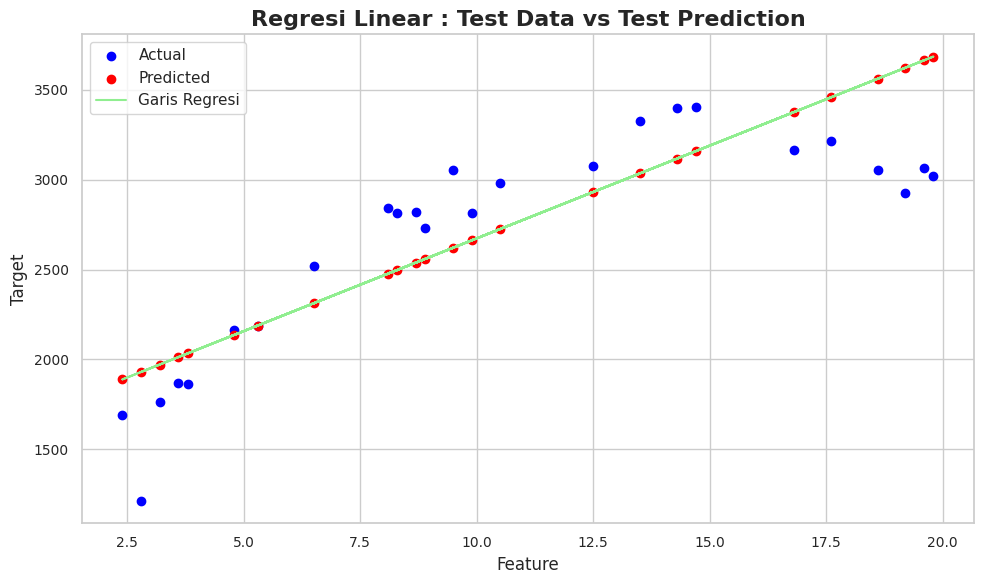

In [67]:
# Buat grafik perbandingan antara data yang ditest dan data hasil prediksi
plt.figure(figsize = (10, 6))
plt.scatter(X_test, y_test, color = 'blue', label = 'Actual')
plt.scatter(X_test, y_test_pred, color = 'red', label = 'Predicted')
plt.plot(X_test, y_test_pred, color = 'lightgreen', label = 'Garis Regresi', linewidth = 1.5)  # Garis untuk menghubungkan nilai-nilai prediksi

# Menambahkan judul dan label pada diagram
plt.title('Regresi Linear : Test Data vs Test Prediction', fontsize = 16, fontweight = 'bold')
plt.xlabel('Feature', fontsize = 12)
plt.ylabel('Target', fontsize = 12)
plt.legend()
plt.grid(True)

# Tingkatkan ke-estetikan diagram
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.tight_layout()

# Mendisplay diagram
plt.show()

In [68]:
# Cek tingkat kesalahan/error/galat antara prediksi train_data dan prediksi test_data
from sklearn.metrics import mean_squared_error, r2_score

y_test_pred = model_lr.predict(X_test_reshape)
y_train_pred = model_lr.predict(X_train_reshape)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"""
Mean Squared Error (MSE) :
  Train : {mse_train:.2f}
  Test  : {mse_test:.2f}
  Gap   : {abs(mse_train - mse_test):.2f}
Nilai R^2 :
  Train : {r2_train:.2f}
  Test  : {r2_test:.2f}
      """)


Mean Squared Error (MSE) :
  Train : 107699.85
  Test  : 128111.12
  Gap   : 20411.27
Nilai R^2 :
  Train : 0.77
  Test  : 0.63
      


In [23]:
# Intecept dan koefisien garis regresi
print('Intercept model Regresi Linear : ',model_lr.intercept_)
print('Koefisien garis Regresi Linear :',model_lr.coef_)

Intercept model Regresi Linear :  1641.365997520288
Koefisien garis Regresi Linear : [103.19725286]


### Maka, model Regresi Linearnya adalah
# y = 1641.366 + 103.197 x

## Model Decision Tree

In [24]:
# Impor Model Regresi Linear dari Scikit Learn
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train_reshape, y_train)

DecisionTreeRegressor(random_state=42)

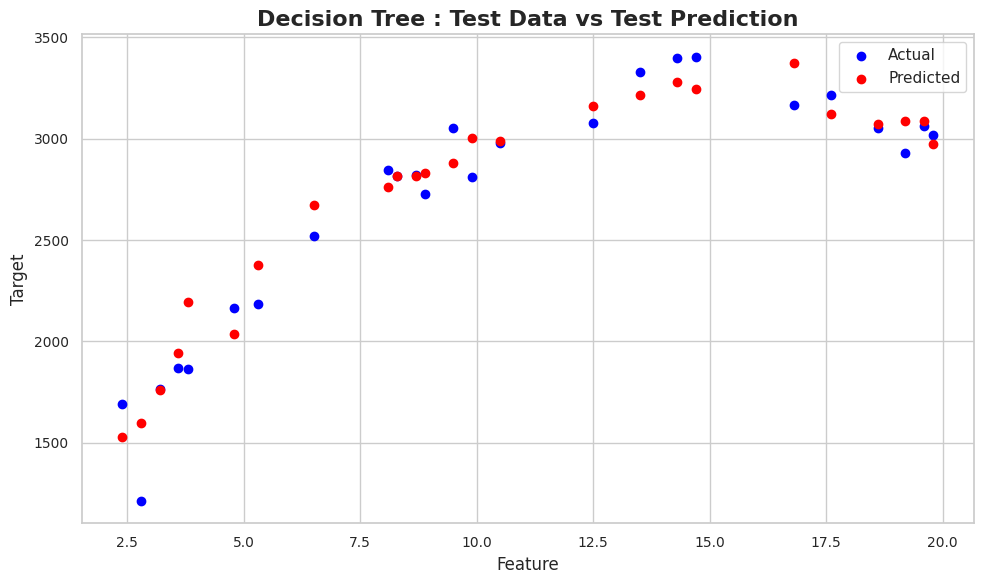

In [69]:
# Buat grafik perbandingan antara data yang ditest dan data hasil prediksi
y_pred_dt = model_dt.predict(X_test_reshape)
plt.figure(figsize = (10, 6))
plt.scatter(X_test, y_test, color = 'blue', label = 'Actual')
plt.scatter(X_test, y_pred_dt, color = 'red', label = 'Predicted')

# Menambahkan judul dan label pada diagram
plt.title('Decision Tree : Test Data vs Test Prediction', fontsize = 16, fontweight = 'bold')
plt.xlabel('Feature', fontsize = 12)
plt.ylabel('Target', fontsize = 12)
plt.legend()
plt.grid(True)

# Tingkatkan ke-estetikan diagram
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.tight_layout()

# Mendisplay diagram
plt.show()

In [70]:
# Cek tingkat kesalahan/error/galat antara prediksi train_data dan prediksi test_data
from sklearn.metrics import mean_squared_error, r2_score

y_test_pred = model_dt.predict(X_test_reshape)
y_train_pred = model_dt.predict(X_train_reshape)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"""
Mean Squared Error (MSE) :
  Train : {mse_train:.2f}
  Test  : {mse_test:.2f}
  Gap   : {abs(mse_train - mse_test):.2f}
Nilai R^2 :
  Train : {r2_train:.2f}
  Test  : {r2_test:.2f}
      """)


Mean Squared Error (MSE) :
  Train : 88.12
  Test  : 23627.99
  Gap   : 23539.87
Nilai R^2 :
  Train : 1.00
  Test  : 0.93
      


## Model Random Forest

In [71]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train_reshape, y_train)

RandomForestRegressor(random_state=42)

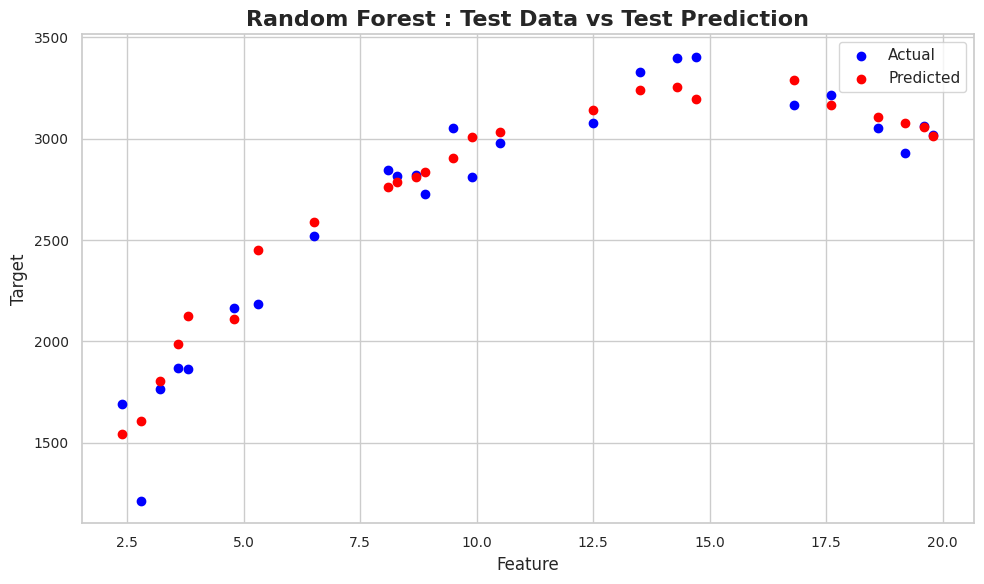

In [72]:
# Buat grafik perbandingan antara data yang ditest dan data hasil prediksi
y_pred_rf = model_rf.predict(X_test_reshape)
plt.figure(figsize = (10, 6))
plt.scatter(X_test, y_test, color = 'blue', label = 'Actual')
plt.scatter(X_test, y_pred_rf, color = 'red', label = 'Predicted')

# Menambahkan judul dan label pada diagram
plt.title('Random Forest : Test Data vs Test Prediction', fontsize = 16, fontweight = 'bold')
plt.xlabel('Feature', fontsize = 12)
plt.ylabel('Target', fontsize = 12)
plt.legend()
plt.grid(True)

# Tingkatkan ke-estetikan diagram
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.tight_layout()

# Mendisplay diagram
plt.show()

In [73]:
# Cek tingkat kesalahan/error/galat antara prediksi train_data dan prediksi test_data
from sklearn.metrics import mean_squared_error, r2_score

y_test_pred = model_rf.predict(X_test_reshape)
y_train_pred = model_rf.predict(X_train_reshape)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"""
Mean Squared Error (MSE) :
  Train : {mse_train:.2f}
  Test  : {mse_test:.2f}
  Gap   : {abs(mse_train - mse_test):.2f}
Nilai R^2 :
  Train : {r2_train:.2f}
  Test  : {r2_test:.2f}
      """)


Mean Squared Error (MSE) :
  Train : 3737.44
  Test  : 21744.73
  Gap   : 18007.29
Nilai R^2 :
  Train : 0.99
  Test  : 0.94
      
